# Step 0: Download and Procress Data

You need to run the code below here and ensure that it works.  Assuming it has run without any error messages, there is nothing more you need to do.

## Fetch Data from UCI

This downloads the data from the UCI machine learning database repository.  If are using this notebook on a local machine and it doesn't work for you, you can download the files directly from https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/ and place them in your working directory.

In [2]:
import math
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.names


--2021-10-11 17:51:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K  --.-KB/s    in 0.1s    

2021-10-11 17:51:35 (2.60 MB/s) - ‘arrhythmia.data’ saved [402355/402355]

--2021-10-11 17:51:35--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.names
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: 6162 (6.0K) [application/x-httpd-php]
Saving to: ‘arrhythmia.names’

arrhythmia.names    100%[===================>]   6.02K  --.-KB/s    in 0s      

2021-10-11 17:51:35 (71.1 MB/s) - ‘arrhythmia.names’ saved [6162/6162]

FINIS

In [3]:
print("First lines of the datafile:")
!head -n 10 arrhythmia.names

print("First lines of the datafile:")
!head -n 5 arrhythmia.data

First lines of the datafile:
1. Title: Cardiac Arrhythmia Database

2. Sources:
   (a) Original owners od Database:
       -- 1. H. Altay Guvenir, PhD., 
             Bilkent University,
             Department of Computer Engineering and Information Science,
             06533 Ankara, Turkey
             Phone: +90 (312) 266 4133
             Email: guvenir@cs.bilkent.edu.tr
First lines of the datafile:
75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5

## Load and Parse Data with Pandas

This sets up a Pandas DataFrame object which has proper names and datatypes for the dataset.  Pandas is a standard and widely used library for data science.  You can learn more about it here: https://pandas.pydata.org/docs/getting_started/index.html

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.special as spsp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

channels = ['di','dii','diii','avr','avl','avf','v1','v2','v3','v4','v5','v6']
features = [('age','num'), ('sex','bool'), ('height','num'), ('weight','num')] + \
           [('qrs_dur','num'), ('pr_inter','num'), ('qt_inter','num'), ('t_inter','num'), ('p_inter','num')] + \
           [('qrs','num'), ('t','num'), ('p','num'), ('qrst','num'), ('j','num'), ('heart_rate','num')]
for chan in channels:
  for fn in ['width_q', 'width_r', 'width_s', 'width_rp', 'width_sp','num_deflections',
             'ragged_r', 'diphasic_r','ragged_p', 'diphasic_p',
             'ragged_t', 'diphasic_t']:

    if fn.startswith('ragged') or fn.startswith('diphasic'):
      features.append((chan + '_' + fn,'bool'))
    else:
      features.append((chan + '_' + fn,'num'))

for chan in channels:
  for fn in ['amp_jj', 'amp_q', 'amp_r', 'amp_s', 'amp_rp', 'amp_sp', 'amp_p', 'amp_t', 'qrsa', 'qrsta']:
    features.append((chan + '_' + fn,'num'))
    # feature_names.append(chan + '_' + fn)

features.append(('class','cat'))
feature_names = [ a for a,b in features ]
dtype_map = {'bool':np.bool, 'num':np.float64, 'cat':np.int8}
feature_dtypes = dict([(a,dtype_map[b]) for a,b in features ])

data = pd.read_csv('arrhythmia.data',
                   names=feature_names,dtype=feature_dtypes,
                   na_values='?')
data.head()

,age,sex,height,weight,qrs_dur,pr_inter,qt_inter,t_inter,p_inter,qrs,t,p,qrst,j,heart_rate,di_width_q,di_width_r,di_width_s,di_width_rp,di_width_sp,di_num_deflections,di_ragged_r,di_diphasic_r,di_ragged_p,di_diphasic_p,di_ragged_t,di_diphasic_t,dii_width_q,dii_width_r,dii_width_s,dii_width_rp,dii_width_sp,dii_num_deflections,dii_ragged_r,dii_diphasic_r,dii_ragged_p,dii_diphasic_p,dii_ragged_t,dii_diphasic_t,diii_width_q,...,v3_amp_q,v3_amp_r,v3_amp_s,v3_amp_rp,v3_amp_sp,v3_amp_p,v3_amp_t,v3_qrsa,v3_qrsta,v4_amp_jj,v4_amp_q,v4_amp_r,v4_amp_s,v4_amp_rp,v4_amp_sp,v4_amp_p,v4_amp_t,v4_qrsa,v4_qrsta,v5_amp_jj,v5_amp_q,v5_amp_r,v5_amp_s,v5_amp_rp,v5_amp_sp,v5_amp_p,v5_amp_t,v5_qrsa,v5_qrsta,v6_amp_jj,v6_amp_q,v6_amp_r,v6_amp_s,v6_amp_rp,v6_amp_sp,v6_amp_p,v6_amp_t,v6_qrsa,v6_qrsta,class
0,75.0,False,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,13.0,64.0,-2.0,NaN,63.0,0.0,52.0,44.0,0.0,0.0,32.0,False,False,False,False,False,False,0.0,44.0,20.0,36.0,0.0,28.0,False,False,False,False,False,False,52.0,...,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56.0,True,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,37.0,-17.0,31.0,NaN,53.0,0.0,48.0,0.0,0.0,0.0,24.0,False,False,False,False,False,False,0.0,64.0,0.0,0.0,0.0,24.0,False,False,False,False,False,False,32.0,...,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54.0,False,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,34.0,70.0,66.0,23.0,75.0,0.0,40.0,80.0,0.0,0.0,24.0,False,False,False,False,False,False,20.0,56.0,52.0,0.0,0.0,40.0,False,False,False,False,False,False,28.0,...,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55.0,False,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,11.0,-5.0,20.0,NaN,71.0,0.0,72.0,20.0,0.0,0.0,48.0,False,False,False,False,False,False,0.0,64.0,36.0,0.0,0.0,36.0,False,False,False,False,False,False,20.0,...,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75.0,False,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,13.0,61.0,3.0,NaN,NaN,0.0,48.0,40.0,0.0,0.0,28.0,False,False,False,False,False,False,0.0,40.0,24.0,0.0,0.0,24.0,False,False,False,False,False,False,52.0,...,0.0,8.5,-10.2,0.0,0.0,-1.0,4.7,-4.0,43.0,-0.2,0.0,15.2,-7.8,0.0,0.0,-0.1,4.9,16.2,63.2,-0.2,0.0,9.1,-0.9,0.0,0.0,-0.2,2.9,21.7,48.9,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


## Remove columns for features with missing values
Missing values occur frequently in real data such as this.  For now we will remove input columns which have missing data but handling them properly can be critical in practice.

In [5]:
missing_cols = []
for c in data.columns:
  if np.any(pd.isnull(data[c])):
    missing_cols.append(c)

print("Removing " + str(missing_cols))
clean_data = data.drop(columns=missing_cols)
num_data = len(clean_data)
print("There are {} input dimensions".format(clean_data.shape[1]-1))

Removing ['t', 'p', 'qrst', 'j', 'heart_rate']
There are 274 input dimensions


# Step 1: Data Exploration
A critical step in any ML application is dataset exploration.  You should always be familiar with your data.  How many inputs do you have?  What kinds are they?  If you do simple visualizations, can you get a sense of whether the prediction problem is possible.

## Produce histograms
Produce histograms of some of the inputs to visualize the distribution of different input dimensions and their potential impact on the class label.

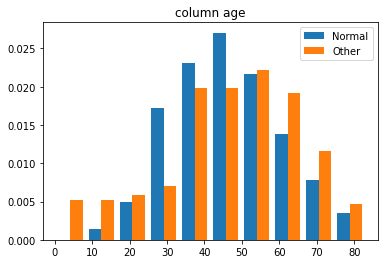

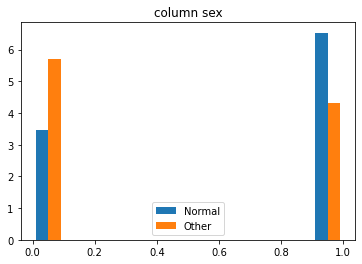

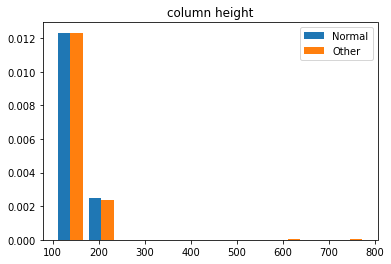

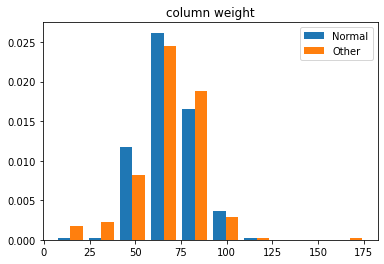

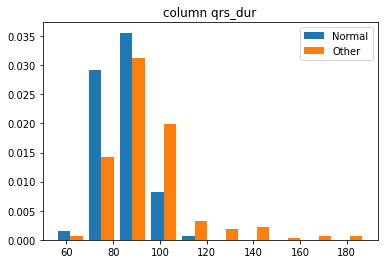

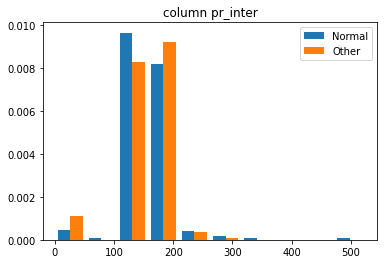

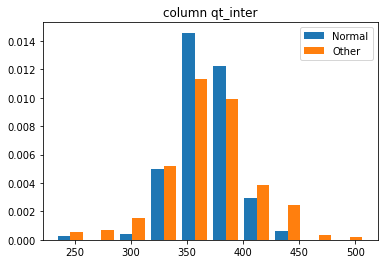

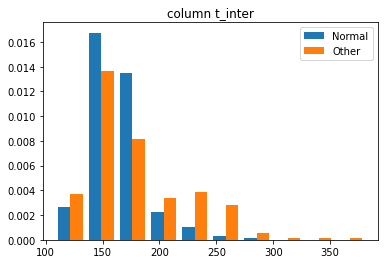

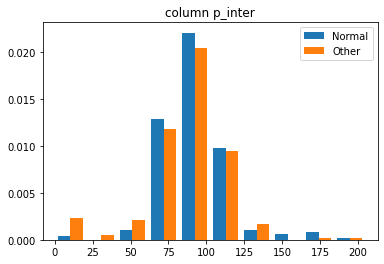

In [6]:
vis_dims = ['age','sex','height','weight','qrs_dur','pr_inter','qt_inter','t_inter','p_inter']

for c in vis_dims:
  plt.figure()
  coltype = clean_data.dtypes[c]
  coldata = clean_data[c].astype(np.float32)
  plt.title('column {}'.format(c))
  plt.hist([coldata[clean_data['class'] == 1],
            coldata[clean_data['class'] != 1]],
           density=True, # normalize the histograms
           label=['Normal','Other'])
  plt.legend()


## Split data into training and validation
Randomly select a subset of the data to use for training and the rest for validation.  For educational purposes we are going to use a small fraction of the dataset for training (5%) in order to more easily see the value of regularization.  In a real world setting you would typically use something like 80% or 90% for training.

In [7]:
def split_dataset(input_data,pct_train,seed=0):
  num_data = len(input_data)
  # Set a fixed random seed to ensure repeatability
  np.random.seed(seed)
  perm = np.random.permutation(num_data)

  num_train = int(pct_train*num_data)
  num_val = num_data - num_train

  data_train = input_data.iloc[perm[0:num_train]].reset_index(drop=True)
  data_val = input_data.iloc[perm[num_train:]].reset_index(drop=True)

  print("Using {} samples for training data and {} samples for validation".format(num_train,num_val))

  # Split output from inputs
  train_x = data_train.drop(columns=['class'])
  train_y = data_train['class'] == 1 # Classify normal vs abnormal

  val_x = data_val.drop(columns=['class'])
  val_y = data_val['class'] == 1 # Classify normal vs abnormal

  return train_x, train_y, val_x, val_y

data_train_x, data_train_y, data_val_x, data_val_y = split_dataset(clean_data,pct_train = 0.05,seed=0)



Using 22 samples for training data and 430 samples for validation
     age    sex  height  weight  ...  v6_amp_p  v6_amp_t  v6_qrsa  v6_qrsta
0   37.0   True   159.0    56.0  ...       0.4       1.2      9.4      16.6
1   52.0  False   165.0    80.0  ...       0.4      -0.3     19.6      17.7
2   12.0   True   165.0    47.0  ...      -0.4       1.6     24.0      38.0
3   80.0  False   160.0    70.0  ...       0.9       0.4     26.7      30.3
4   72.0  False   171.0    74.0  ...       0.7       0.8     25.8      31.4
5   41.0   True   155.0    56.0  ...       0.6       2.9     12.8      38.9
6   54.0   True   172.0    58.0  ...       0.8       0.5      8.8      12.1
7   44.0  False   170.0    84.0  ...       0.5      -6.0     86.4       8.4
8   51.0   True   165.0    85.0  ...       0.5       1.0     31.3      37.5
9   45.0  False   177.0    72.0  ...       0.6      -2.2     -8.3     -38.6
10  57.0  False   165.0    74.0  ...       0.9       0.6     17.1      22.0
11  60.0   True   160.

## Compute and print basic statistics

**YOU MUST IMPLEMENT AND ANSWER THINGS HERE**

Write code which computes and prints:
1. The fraction of training data for people under the age of 20 
2. The fraction of training data for people over the age of 50
3. The fraction of training data which are indicated as normal (i.e., with the value in the 'class' column being 1)

Answer the following questions in your report:
1. Does this seem like a good distribution of ages for the dataset?  Would you feel comfortable relying on the output of the resulting model if you were under 20?  What if you were over 50?  Why?
2. If you were to build a model which always spit out the same label (either normal or not), based on this training data what label should it output?  What do you think the accuracy of that model would be?  Why?
3. Based on the histograms above, hard hard do you think this prediction task is and why?  Should we expect to get perfect?  Should we be able to do better than chance?  Include copies of any figures you reference in your answer to this question.

In [8]:
num_train = data_train_x.shape[0]

frac_u20 = np.sum(data_train_x['age'] < 20)/num_train
print('Fraction of dataset with age < 20: {}'.format(frac_u20))

frac_o50 = np.sum(data_train_x['age'] > 50)/num_train
print('Fraction of dataset with age < 50: {}'.format(frac_o50))

frac_female = np.sum(data_train_x['sex'] == 1)/num_train
print('Fraction of dataset indicated as female: {}'.format(frac_female))

frac_normal = np.sum(data_train_y == 1)/num_train
print('Fraction of dataset indicated as normal record: {}'.format(frac_normal))

Fraction of dataset with age < 20: 0.045454545454545456
Fraction of dataset with age < 50: 0.5909090909090909
Fraction of dataset indicated as female: 0.5454545454545454
Fraction of dataset indicated as normal record: 0.36363636363636365


# Step 2: Implement a Naive Bayes classifier

## Code for a Naive Bayes model

This is the part which implements the mathematical model for our dataset.  For learning, this involves estimating the parameters of the appropriate distributions for each feature conditional on the output class label.  In order to make predictions, we also need to be able to evaluate the (log) probability of each distribution.

**YOU MUST IMPLEMENT THINGS HERE**

In [9]:
def bernoulli_logpdf(x,theta):
  lp = np.zeros_like(x,dtype=np.float64)
  if theta == 0:
    lp[x==True] = -np.inf
  elif theta == 1:
    lp[x==False] = -np.inf
  else:
    lp[x==True] = np.log(theta)
    lp[x==False] = np.log1p(-theta)
  return lp

def gaussian_logpdf(x,mu,sigma):
  assert np.isfinite(mu)
  assert np.all(np.isfinite(x))
  ##### THE NEXT LINE IS NEW
  sigma = np.maximum(1e-16,sigma) # Avoid having to handle sigma=0 cases
  
  # TODO: Implement the logpdf of a Gaussian distribution
  lp = np.log(1/(sigma*math.sqrt(2*math.pi))) - 0.5*(((x-mu)/sigma)**2)


  return lp

def fit_bernoulli(x,prior_alpha):
  # TODO: Compute MAP estimate of theta
  lp = np.zeros_like(x,dtype=np.float64)
  theta = (len(lp[x==True])+prior_alpha)/(len(x)+2*prior_alpha)
  return {'logprob':bernoulli_logpdf, 'params':{'theta':theta}}

def fit_gaussian(x,prior_mu_val,prior_sigma_val,prior_dof):
  numx = len(x)
  assert numx>2
  # TODO: Compute MAP estimate of mu and sigma
 
  mu = (np.mean(x)*len(x))/(len(x)+prior_dof)
  sigma = math.sqrt(((np.std(x)**2)*len(x) + prior_dof)/(len(x)+prior_dof))
  return {'logprob':gaussian_logpdf, 'params':{'mu':mu,'sigma':sigma} }

def fit_naivebayes(x,y,prior_dof=0,prior_mu_val=0,prior_sigma_val=1):
  y_vals = [False, True]
  prior_dist = fit_bernoulli(y,prior_alpha=prior_dof)
  cond_dists = dict([ (yv,{}) for yv in y_vals ])
  for c in x.columns:
    coltype = x.dtypes[c]
    coldata = x[c]
    x_y0 = coldata[y == False]
    x_y1 = coldata[y == True]
    if coltype == 'float64' or coltype == 'float32':
      # fit gaussian
      fit_func = lambda cx: fit_gaussian(cx,prior_mu_val,prior_sigma_val,prior_dof)
    elif coltype == 'bool':
      # fit bernoulli
      fit_func = lambda cx: fit_bernoulli(cx,prior_alpha=prior_dof)
    for yv in y_vals:
      cond_dists[yv][c] = fit_func(coldata[y == yv])

  model = { 'prior':prior_dist,
            'conds':cond_dists,
            'y_vals':y_vals }
  return model

def eval_naivebayes(nbmodel,x,normalize=True):
  numx = x.shape[0]
  numyv = len(nbmodel['y_vals'])
  yv_lp = {}
  yv_all_lps = np.zeros((numyv,numx))
  for i,yv in enumerate(nbmodel['y_vals']):
    yv_lp[yv] = np.zeros(numx)
    yv_lp[yv] += nbmodel['prior']['logprob'](yv,**nbmodel['prior']['params'])
    for c,m in nbmodel['conds'][yv].items():
      clp = m['logprob'](x[c],**m['params'])
      yv_lp[yv] += clp
    yv_all_lps[i,:] = yv_lp[yv]

  if normalize:
    yv_lp_nrm = spsp.logsumexp(yv_all_lps,axis=0)
    ninf_yv_lp_nrm = np.isinf(yv_lp_nrm)

    for yv in nbmodel['y_vals']:
      curr_false = np.logical_and(np.isinf(yv_lp[yv]),ninf_yv_lp_nrm)
      yv_lp[yv] -= yv_lp_nrm
      yv_lp[yv][curr_false] = -np.inf

  return pd.DataFrame(yv_lp)

# Compare the predicted log probability values (yv_lp_xs) against their true labels (gt_ys)
def compare_predictions(gt_ys,yv_lp):
  assert yv_lp.shape[1] == 2 # this code only works for binary models
  
  # Lookup the log probability of the correct class
  correct_lps = yv_lp.lookup(range(len(gt_ys)),gt_ys)

  # TODO: Implement the calculations for these values which are used to compute stats

  # TODO: Total number of ys in the evaluation set
  num_ys = len(gt_ys)

  # TODO: Number of ys with the correct label having highest probability
  avg_logprob = 0
  num_correct = 0
  num_true_pos = 0
  num_true_neg = 0
  
  for i in range(len(gt_ys)):

    if yv_lp[gt_ys[i]][i] > yv_lp[not gt_ys[i]][i]:
      num_correct = num_correct + 1
      avg_logprob = avg_logprob + yv_lp[gt_ys[i]][i]
      if gt_ys[i] == True:
        num_true_pos = num_true_pos+1
      else:
        num_true_neg = num_true_neg+1


  # TODO: Number of ys where y == 1
  # TODO: Number of ys where y == 0
  num_pos_ys = 0
  num_neg_ys = 0
  for i in range(len(gt_ys)):
    if gt_ys[i] ==True:
      num_pos_ys = num_pos_ys+1
    else:
      num_neg_ys = num_neg_ys +1


  # TODO: Average log probability of the correct class
  avg_logprob = avg_logprob/num_correct

  stats = {}
  stats['true_pos_rate'] = num_true_pos/num_pos_ys
  stats['true_neg_rate'] = num_true_neg/num_neg_ys
  stats['correct_lps'] = correct_lps
  stats['pct_correct'] = num_correct / num_ys
  stats['avg_logprob'] = avg_logprob

  
  return stats


## Fit the parameters of Naive Bayes with maximum likelihood and maximum a posteriori estimates

See what happens when using maximum likelihood estimates (i.e., `prior_dof=0`).

In [10]:
nbmodel_ML = fit_naivebayes(data_train_x,data_train_y,prior_dof=0)


### Evaluate the ML-fit model on the training data

Training Set Prediction Statistics
  Accuracy: 0.8636363636363636
  True Positive Rate: 1.0
  True Negative Rate: 0.7857142857142857


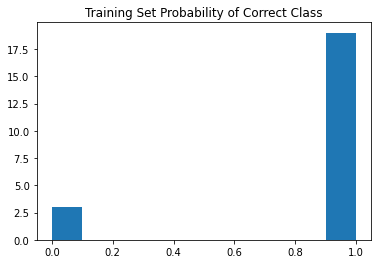

In [11]:

data_train_lp = eval_naivebayes(nbmodel_ML,data_train_x)
train_stats = compare_predictions(data_train_y,data_train_lp)

plt.figure()
plt.title('Training Set Probability of Correct Class')
plt.hist(np.exp(train_stats['correct_lps']))
print('Training Set Prediction Statistics')
print('  Accuracy: {}'.format(train_stats['pct_correct']))
print('  True Positive Rate: {}'.format(train_stats['true_pos_rate']))
print('  True Negative Rate: {}'.format(train_stats['true_neg_rate']))



### Evaluate the ML-fit model on the validation set

Validation Set Prediction Statistics
  Accuracy: 0.5232558139534884
  True Positive Rate: 0.620253164556962
  True Negative Rate: 0.40414507772020725


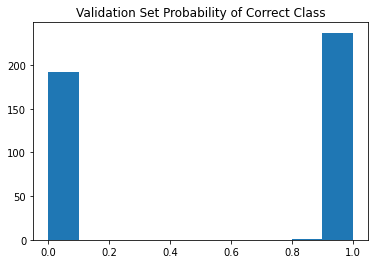

In [12]:
data_val_lp = eval_naivebayes(nbmodel_ML,data_val_x)
val_stats = compare_predictions(data_val_y,data_val_lp)

plt.figure()
plt.title('Validation Set Probability of Correct Class')
plt.hist(np.exp(val_stats['correct_lps']))
print('Validation Set Prediction Statistics')
print('  Accuracy: {}'.format(val_stats['pct_correct']))
print('  True Positive Rate: {}'.format(val_stats['true_pos_rate']))
print('  True Negative Rate: {}'.format(val_stats['true_neg_rate']))



## Explore different prior strengths

Fit Naive Bayes models with different values of `prior_dof`.  For each value, fit a model and evaluate it on both the training and validation set


**YOU NEED TO IMPLEMENT THINGS HERE**

[0, 0.1, 0.25, 0.5, 0.75, 1, 2, 4, 6, 8, 16]
Fitting models...done.
Evaluating models...done.


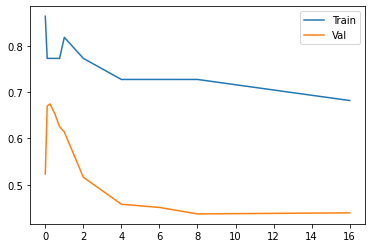

In [13]:
dofs = [0,0.1,0.25,0.5,0.75,1] + list(range(2,9,2)) + [ 2**d for d in range(4,5) ]
print(dofs)
print('Fitting models...',end="")
# TODO: Implement this
all_nbmodels=[]
for i in range(len(dofs)):
  all_nbmodels.append(fit_naivebayes(data_train_x,data_train_y,prior_dof=dofs[i]))
print('done.')

print('Evaluating models...',end="")

data_train_lp = []
all_train_stats = []
# TODO: Implement this
for i in range(len(all_nbmodels)):
  data_train_lp.append(eval_naivebayes(all_nbmodels[i],data_train_x))
for i in range(len(data_train_lp)):
  all_train_stats.append(compare_predictions(data_train_y,data_train_lp[i]))


data_val_lp = []
all_val_stats = []

for i in range(len(all_nbmodels)):
  data_val_lp.append(eval_naivebayes(all_nbmodels[i],data_val_x))
for i in range(len(data_val_lp)):
  all_val_stats.append(compare_predictions(data_val_y,data_val_lp[i]))

print('done.')

all_val_train_acc = [ stats['pct_correct'] for stats in all_train_stats ]
all_val_val_acc = [ stats['pct_correct'] for stats in all_val_stats ]
plt.figure()
plt.plot(dofs,all_val_train_acc,label='Train')
plt.plot(dofs,all_val_val_acc,label='Val')
plt.legend()

# TODO: select the model with the best performance on the validation set
data_lps=[]
val_statss=[]
for i in range(len(all_nbmodels)):
  data_lps.append(eval_naivebayes(all_nbmodels[i],data_val_x))
  val_statss.append(compare_predictions(data_val_y,data_lps[i]))

max = 0
maxindex = -1
for i in range(len(val_statss)):
  if val_statss[i]['pct_correct'] > max:
    max = val_statss[i]['pct_correct']
    maxindex = i
nbmodel_MAP = all_nbmodels[maxindex]



**YOU NEED TO ANSWER THINGS HERE**

Consider the outputs above as you answer the following questions.
1. Describe and explain the difference between the model performance on the training and validation sets when performing maximum likelihood estimation.  That is, what differences do you notice in the performance and why they might be occuring?
2. Which value of `prior_dof` should you use if you only looked at the model performance on the training curve?  What about if you looked instead at the model performance on the validation curve?  Explain your answer.
3. What happens to model performance as `prior_dof` increases?  Why?  What would you expect to happen as `prior_dof` goes to infinity and why?  Specifically, how would the curves for training and validation performance behave in that limit?

# Step 3: Inspect the model

**YOU MUST IMPLEMENT THINGS HERE**

In [15]:
def find_val_importance(nbmodel,x,y):
  imp_vals = []

  t_num = np.sum(y == True)
  f_num = np.sum(y == False)
  
  for c in x.columns:
    
    coltype = x.dtypes[c]
    if coltype == 'bool':
      # TODO: Compute importance value and append to imp_vals
  
      imp_val = abs(np.log(nbmodel['conds'][True][c]['params']['theta']) -np.log(nbmodel['conds'][False][c]['params']['theta']))
      imp_vals.append((c,imp_val))
  # sort imp_vals so that largest features are first
  imp_vals.sort(key=lambda x: x[1],reverse=True)
  return imp_vals

impvals_full = find_val_importance(nbmodel_MAP,data_train_x,data_train_y)

print('Top 5 most important binary features')
for k,v in impvals_full[:10]:
  print(' Importance of {}: {}'.format(k,v))

print('\nBottom 5 least important binary features')
for k,v in impvals_full[-10:]:
  print(' Importance of {}: {}'.format(k,v))

Top 5 most important binary features
 Importance of v3_ragged_r: 1.6631420914059616
 Importance of v4_diphasic_t: 1.6631420914059616
 Importance of di_ragged_p: 1.0753554265038425
 Importance of dii_diphasic_r: 1.0753554265038425
 Importance of dii_diphasic_t: 1.0753554265038425
 Importance of diii_diphasic_r: 1.0753554265038425
 Importance of avr_diphasic_t: 1.0753554265038425
 Importance of v1_ragged_p: 1.0753554265038425
 Importance of v1_diphasic_t: 1.0753554265038425
 Importance of v2_ragged_r: 1.0753554265038425

Bottom 5 least important binary features
 Importance of v5_diphasic_r: 0.5340824859302575
 Importance of v5_ragged_p: 0.5340824859302575
 Importance of v5_diphasic_p: 0.5340824859302575
 Importance of v5_ragged_t: 0.5340824859302575
 Importance of v6_ragged_r: 0.5340824859302575
 Importance of v6_diphasic_r: 0.5340824859302575
 Importance of v6_ragged_p: 0.5340824859302575
 Importance of v6_diphasic_p: 0.5340824859302575
 Importance of v6_ragged_t: 0.5340824859302575
 Im